In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive (1).zip'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mi

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/raw-img'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
/content/raw-img/elefante/OIP-W3F9TmH4OzqmtGZJaqF4uQHaEc.jpeg
/content/raw-img/elefante/OIP-JE6o58cmrSJx0FE_NTKf1AHaKD.jpeg
/content/raw-img/elefante/OIP-HHwlX82soupqbntSzTz1KgHaIB.jpeg
/content/raw-img/elefante/OIP-EcpVXXDQkX9ehwBpDboY-AHaE8.jpeg
/content/raw-img/elefante/OIP-CvZC6dqxUfS2opJltcUAigHaHa.jpeg
/content/raw-img/elefante/ea37b70b28f0003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
/content/raw-img/elefante/OIP-zbPZNqeqEZ8Nj5QmqSV23gHaE6.jpeg
/content/raw-img/elefante/OIP-sp2GhKbYlbLULUipVmfIDAHaHr.jpeg
/content/raw-img/elefante/e837b90b2afc043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
/content/raw-img/elefante/OIP-9KMOrasuzShTUl1Igk3LugHaFj.jpeg
/content/raw-img/elefante/e830b3092ff4083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
/content/raw-img/elefante/OIP-J-HxscTy7E7065vLmdziUgHaEI.jpeg
/content/raw-img/elefante/OIP-RPtIgpSt71rk0Uy3f1x09wHaE8.jpeg
/content/raw-img/elefante/

In [ ]:
! pip install split-folders

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
data_dir = "/content/raw-img"
data_dir = pathlib.Path(data_dir)

#  Importing Images

In [ ]:
Total_Images = glob.glob('/content/raw-img/*/*.jpeg')
print("Total Number of Images", len(Total_Images))
Total_Images = pd.Series(Total_Images)

Total Number of Images 24209


In [ ]:
Total_Df = pd.DataFrame()

Total_Df['FileName'] = Total_Images.map(lambda ImageName :ImageName.split("H")[-1])

Total_Df['ClassId'] = Total_Images.map(lambda ImageName :ImageName.split("/")[-2])

Total_Df.head()

FileName  ClassId
0  aE8.jpeg  cavallo
1  aG8.jpeg  cavallo
2  aE7.jpeg  cavallo
3  aGS.jpeg  cavallo
4  aFg.jpeg  cavallo

In [ ]:
Class_Id_Dist_Total = Total_Df['ClassId'].value_counts()
Class_Id_Dist_Total.head(10)

ClassId
cane          4863
ragno         4497
gallina       3098
cavallo       2623
mucca         1866
scoiattolo    1862
farfalla      1650
pecora        1444
gatto         1227
elefante      1079
Name: count, dtype: int64

# Total Data Distribution

In [ ]:
fig = go.Figure(go.Bar(
            x= Class_Id_Dist_Total.values,
            y=Class_Id_Dist_Total.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()


# Siplting the Data into Train test and Val

In [ ]:
splitfolders.ratio(data_dir, output="output", seed=101, ratio=(.8, .1, .1))

Copying files: 26179 files [00:09, 2710.92 files/s]


In [ ]:
train_path='/content/output/train'
val_path='/content/output/val'
test_path='/content/output/test'
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)

In [ ]:
train_image1 = glob.glob('/content/output/train/*/*.jpeg')

Total_TrainImages = train_image1
print("Total number of training images: ", len(Total_TrainImages))


test_image1 = glob.glob('./output/test/*/*.jpeg')

Total_TestImages = test_image1
print("Total number of test images: ", len(Total_TestImages))



Val_image1 = glob.glob('./output/val/*/*.jpeg')

Total_ValImages = Val_image1
print("Total number of val images: ", len(Total_ValImages))

Total number of training images:  19366
Total number of test images:  2447
Total number of val images:  2396


In [ ]:
random_x = [len(Total_TrainImages), len(Total_TestImages), len(Total_ValImages)]
names = ['Train_Data', 'Test_Data', 'Val_Data']
fig = px.pie(values=random_x, names=names)
fig.update_layout(title='Data Distribution',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

# Displaying The Images

In [ ]:
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for i in range(12):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(os.path.join(train_path,label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([])

# Image Data Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False)

Found 20938 images belonging to 10 classes.
Found 2627 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.


# Identity Block

In [ ]:
def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

# Convolutional Block

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

# Final Model

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 10,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 64)         9472      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1[0][0]']           

# Transfer Learning

In [ ]:
from tensorflow.keras.applications import ResNet50

modelT = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layers in modelT.layers:
    layers.trainable = False

In [ ]:
from keras.layers import  Dropout
y = Flatten()(modelT.output)
y = Dropout(0.5)(y)
y = Dense(10, activation = "softmax")(y)

modelT = keras.Model(modelT.input, y)
modelT.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
modelT.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

# Training The Model

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
mc = ModelCheckpoint('./kaggle/working/model.h5', monitor='val_accuracy', mode='max' )

In [ ]:
History = modelT.fit_generator(train_generator,validation_data=val_generator,epochs=10,verbose=1, callbacks=[mc,es])

<ipython-input-43-79e905ce3fc7>:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/10
655/655 [==============================] - ETA: 0s - loss: 4.8406 - accuracy: 0.8283

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



655/655 [==============================] - 354s 526ms/step - loss: 4.8406 - accuracy: 0.8283 - val_loss: 3.4674 - val_accuracy: 0.9132
Epoch 2/10
655/655 [==============================] - 340s 518ms/step - loss: 5.0514 - accuracy: 0.8827 - val_loss: 4.1028 - val_accuracy: 0.9204
Epoch 3/10
655/655 [==============================] - 332s 507ms/step - loss: 5.0589 - accuracy: 0.8961 - val_loss: 4.9039 - val_accuracy: 0.9254
Epoch 4/10
655/655 [==============================] - 334s 510ms/step - loss: 4.9791 - accuracy: 0.9054 - val_loss: 4.8253 - val_accuracy: 0.9281
Epoch 5/10
655/655 [==============================] - 341s 520ms/step - loss: 4.9530 - accuracy: 0.9162 - val_loss: 5.1341 - val_accuracy: 0.9204
Epoch 6/10
655/655 [==============================] - 333s 509ms/step - loss: 4.8829 - accuracy: 0.9194 - val_loss: 5.4531 - val_accuracy: 0.9277
Epoch 7/10
655/655 [==============================] - 338s 516ms/step - loss: 4.8053 - accuracy: 0.9230 - val_loss: 5.5624 - val_accura

# Plotting the Graph and Result

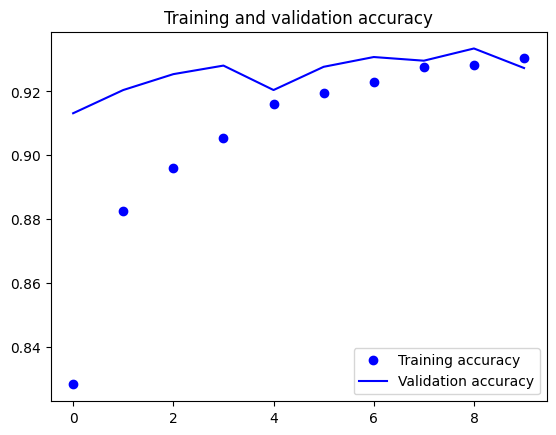

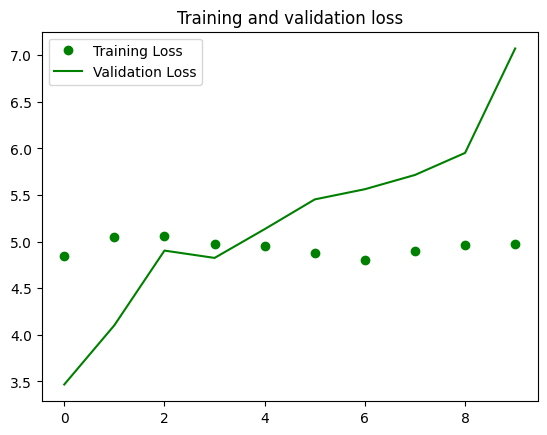

In [ ]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Prediction

In [ ]:
 test_loss, test_acc = modelT.evaluate(test_generator, steps=len(test_generator), verbose=1)
 print('Loss: %.3f' % (test_loss * 100.0))
 print('Accuracy: %.3f' % (test_acc * 100.0))

83/83 [==============================] - 10s 125ms/step - loss: 6.9410 - accuracy: 0.9322
Loss: 694.102
Accuracy: 93.224


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_val = test_generator.classes
y_pred = modelT.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

83/83 [==============================] - 11s 118ms/step


In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       487
           1       0.87      0.95      0.91       263
           2       0.94      0.93      0.94       146
           3       0.93      0.98      0.96       212
           4       0.99      0.94      0.96       311
           5       0.93      0.85      0.89       168
           6       0.92      0.78      0.85       188
           7       0.84      0.93      0.88       182
           8       0.99      0.97      0.98       483
           9       0.89      0.98      0.93       187

    accuracy                           0.93      2627
   macro avg       0.92      0.92      0.92      2627
weighted avg       0.93      0.93      0.93      2627



In [ ]:
class_indices = test_generator.class_indices
indices = {v:k for k,v in class_indices.items()}

In [ ]:
filenames = test_generator.filenames

In [ ]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

filename actual   predicted   Same
0  cane/OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg   cane        cane   True
1  cane/OIP--DQsiH-9LglDNlEvJpZQZQHaFw.jpeg   cane        cane   True
2  cane/OIP--OzHmoOBxcUQs7N3KjButwHaFP.jpeg   cane        cane   True
3  cane/OIP--Z2dg_o5sGo8jua-d6vSagHaEK.jpeg   cane        cane   True
4  cane/OIP--hrVyxBHfXGXIpLKB_ld2AHaEK.jpeg   cane        cane   True
5  cane/OIP--iPPduM2--389E1lozUz_QHaFj.jpeg   cane        cane   True
6  cane/OIP--khXa4p9B3QV8JmsHX29hgHaEK.jpeg   cane  scoiattolo  False
7  cane/OIP-00zvckpZ8XDEzk-Fv4HjkQHaGL.jpeg   cane        cane   True
8  cane/OIP-0ERf2k91vjSIq_POpXYImwHaFj.jpeg   cane        cane   True
9  cane/OIP-0G1lmzPnTshwQJ_IEMNHgQHaFR.jpeg   cane        cane   True

In [ ]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

# Prediction comparison

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img_size = 224
def readImage(path):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.

    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = readImage(f"/content/raw-img/{temp_df.filename[i]}")
        plt.imshow(image)
        plt.title(f'A: {temp_df.actual[i]} P: {temp_df.predicted[i]}')

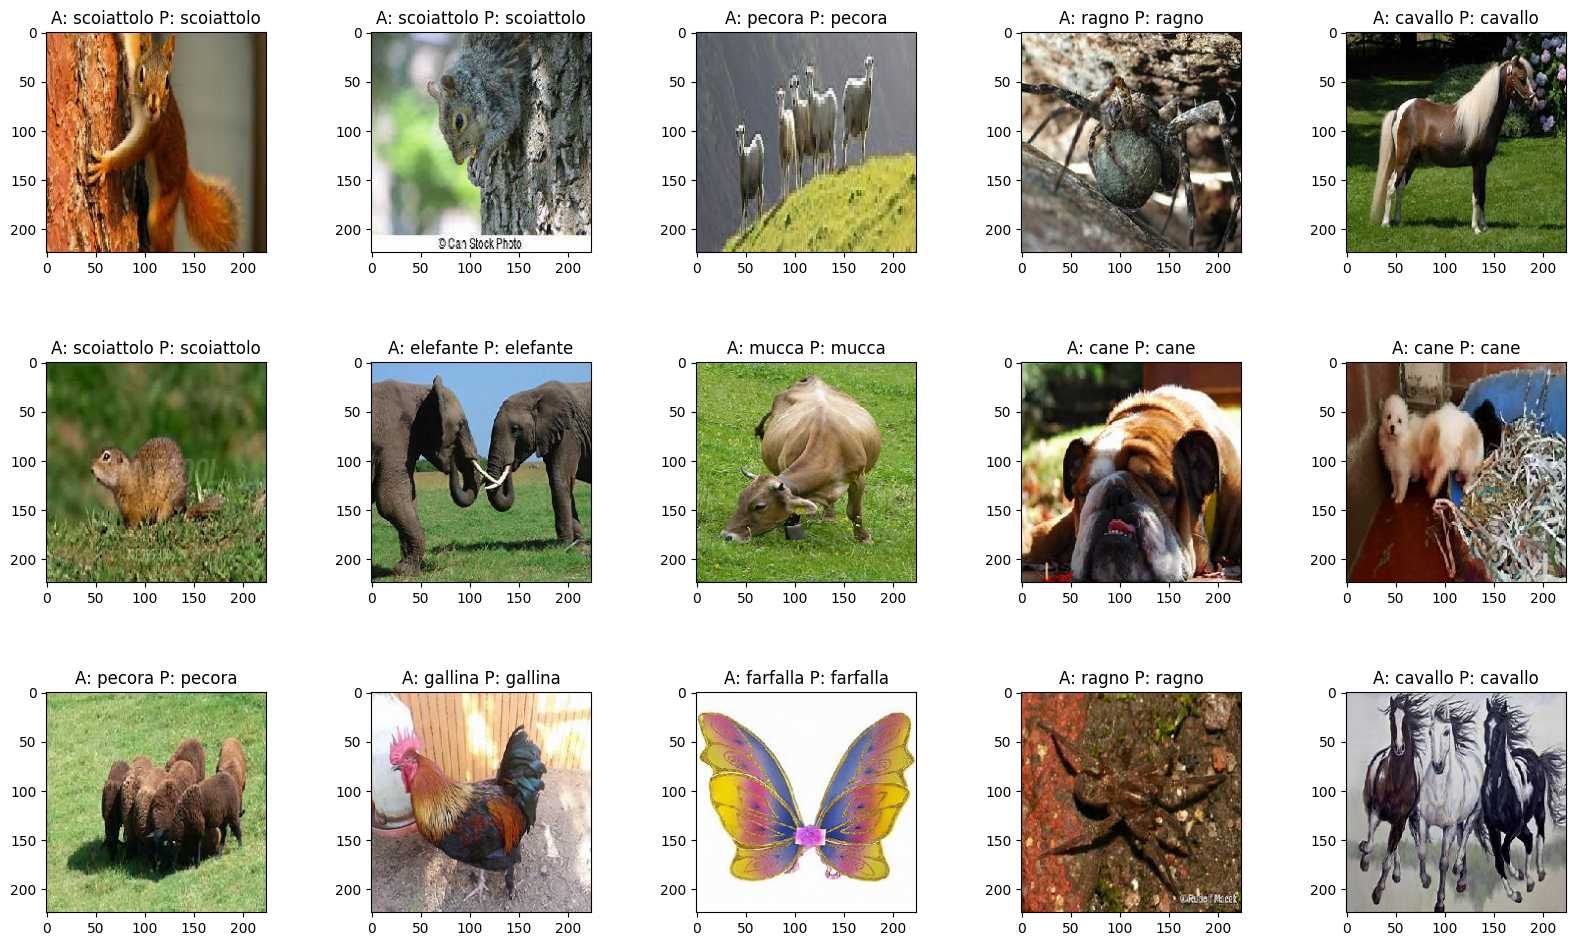

In [ ]:
display_images(val_df[val_df['Same']==True])

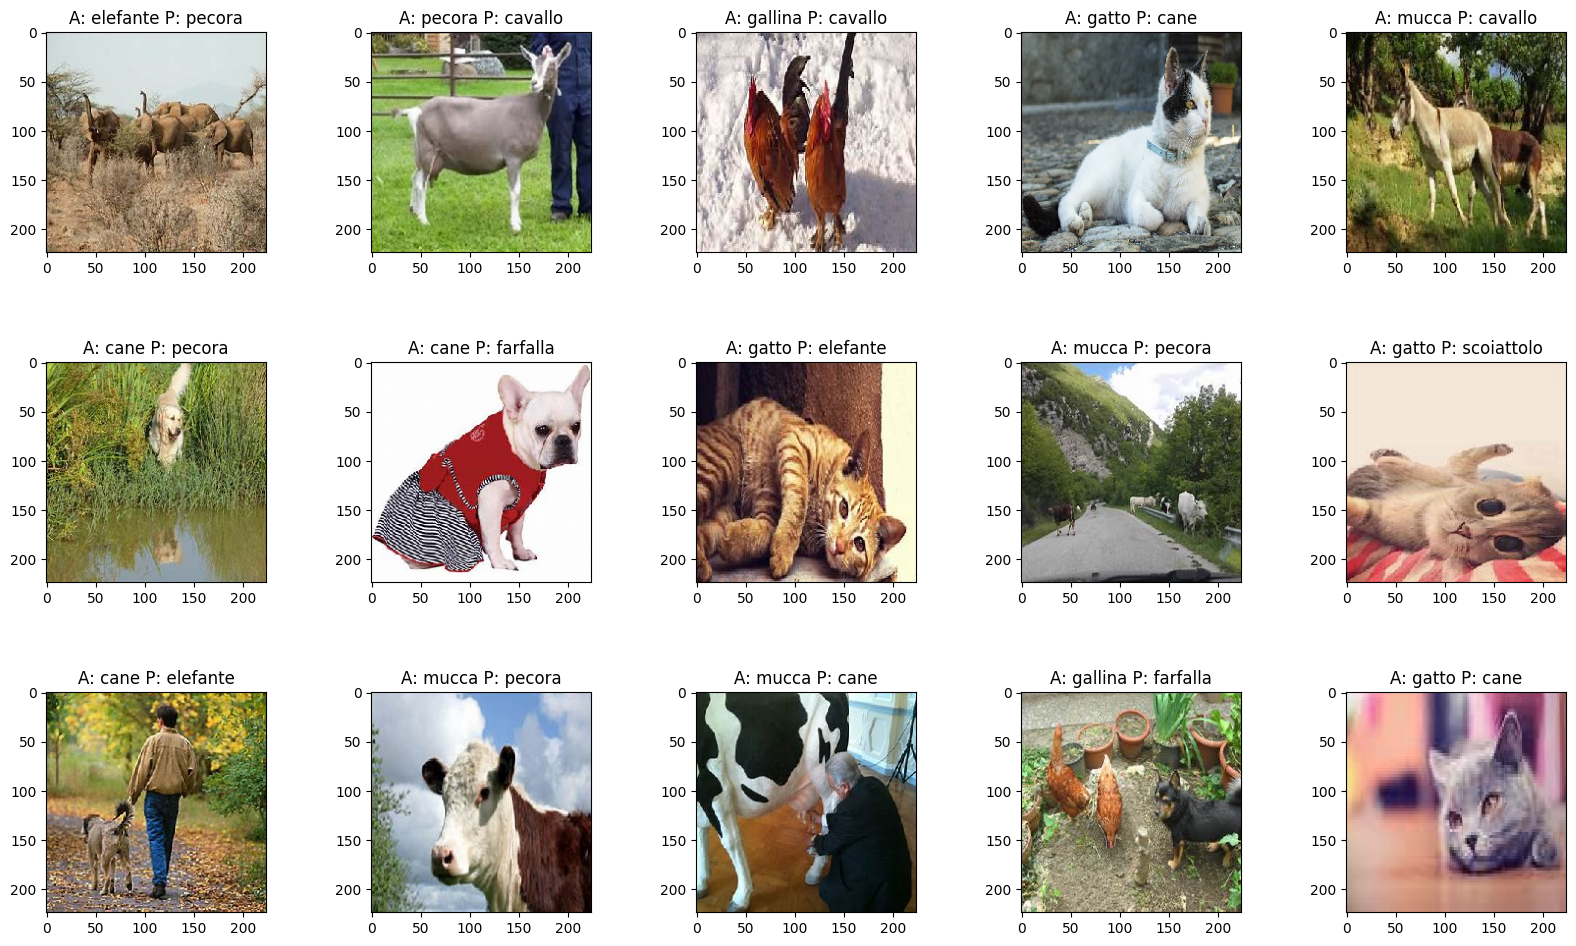

In [ ]:
display_images(val_df[val_df['Same']!=True])

# Confusion Matrix

In [ ]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['cane', 'ragno', 'mucca', 'scoiattolo', 'elefante', 'pecora', 'gatto', 'farfalla', 'gallina', 'cavallo']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Confusion matrix, without normalization
[[453  11   2   1   3   6   1   4   0   6]
 [  2 249   2   0   0   1   3   5   0   1]
 [  0   2 136   0   0   0   1   5   0   2]
 [  0   1   0 208   0   1   0   0   2   0]
 [  6   3   1   2 292   2   2   1   2   0]
 [ 11   0   1   1   1 142   0   2   1   9]
 [  4  16   2   4   0   0 147  15   0   0]
 [  3   4   0   0   0   0   5 169   0   1]
 [  3   0   0   7   0   0   0   0 469   4]
 [  2   0   0   0   0   0   0   1   0 184]]


In [ ]:
from keras.models import load_model

# Tải mô hình đã được huấn luyện
model = load_model('./kaggle/working/model.h5')
